# Visualização de dados.
Exemplos de código para visualização de dados com PySpark e Seaborn.

In [2]:
%pip install ipython-autotime
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=930414b60d6359683a2cea55e3230e8c107781c5f554ef452fe9af725540acec
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


# Imports iniciais.

In [3]:
from google.colab          import drive, files
from pyspark.sql           import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types     import *

%load_ext autotime

time: 279 µs (started: 2023-09-30 16:44:17 +00:00)


# Início da sessão.

In [4]:
drive.mount('/content/drive', force_remount=True)
spark = SparkSession.builder.master('local').appName('pyspark_app').getOrCreate()
spark

Mounted at /content/drive


time: 46.6 s (started: 2023-09-30 16:44:17 +00:00)


# Leitura de arquivos.

In [5]:
houses = spark.read.csv("/content/drive/MyDrive/datasets/housing/housing.csv", header=True, inferSchema=True, encoding='utf-8')
print(f'shape={houses.count(), len(houses.columns)}')
houses.show(5)

shape=(20640, 10)
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37

# Visualização de dados com Seaborn.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

time: 3.68 s (started: 2023-09-30 16:45:20 +00:00)


# Amostragem de dados.
O PySpark é recomendado quando temos que trabalhar com Big Data, ou seja, grande quantidade de dados que não cabem na memória principal de um computador pessoal. Para fazer uma vizualização de dados de forma eficiente, que não leve muito tempo na renderização dos gráficos é recomendável fazer amostragens dos dados. A desvantagem é que perdemos informação e os gráficos ficam menos precisos.
Após a amostragem, podemos utilizar duas técnicas para a visualização:
1.   Utilizando a função collect()
2.   Transformando a amostra em um dataframe do Pandas.



In [7]:
sample = houses.sample(fraction=0.1)

time: 26.9 ms (started: 2023-09-30 16:45:24 +00:00)


## collect()
Quando utilizada com a função select() podemos obter uma lista de valores que pode ser atribuída a um dos eixos do gráfico.

In [8]:
result = sample.select('longitude').collect()
axis_x = [[row[0] for row in result]]
axis_x = np.array(axis_x).ravel()

result = sample.select('latitude').collect()
axis_y = [[row[0] for row in result]]
axis_y = np.array(axis_y).ravel()

time: 3.44 s (started: 2023-09-30 16:45:24 +00:00)


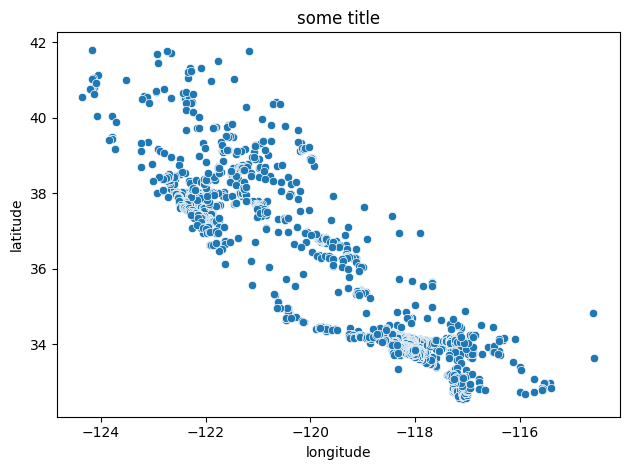

time: 828 ms (started: 2023-09-30 16:45:27 +00:00)


In [9]:
axis = sns.scatterplot(x=axis_x, y=axis_y)
axis.set(xlabel ="longitude", ylabel = "latitude", title ='some title')
plt.tight_layout()
plt.show()

## toPandas()

In [11]:
pd_sample = sample.toPandas()
print(type(pd_sample))
pd_sample.head()

<class 'pandas.core.frame.DataFrame'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY
1,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,NEAR BAY
2,-122.26,37.83,52.0,1656.0,420.0,718.0,382.0,2.6768,182300.0,NEAR BAY
3,-122.29,37.81,26.0,768.0,152.0,392.0,127.0,1.7719,82500.0,NEAR BAY
4,-122.29,37.81,46.0,935.0,297.0,582.0,277.0,0.7286,95200.0,NEAR BAY


time: 628 ms (started: 2023-09-30 16:46:55 +00:00)


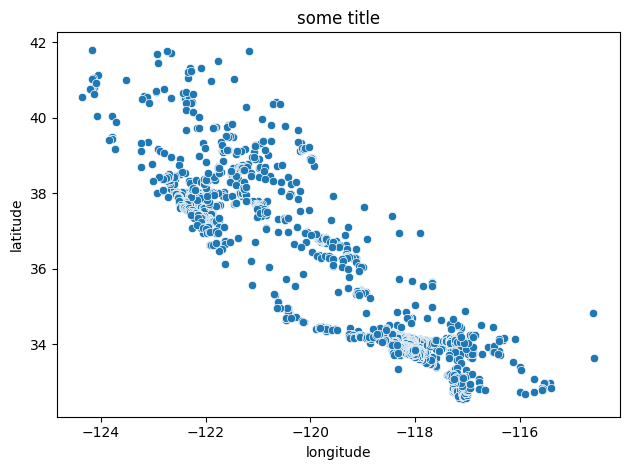

time: 302 ms (started: 2023-09-30 16:47:50 +00:00)


In [12]:
axis = sns.scatterplot(x=pd_sample['longitude'], y=pd_sample['latitude'])
axis.set(xlabel ="longitude", ylabel = "latitude", title ='some title')
plt.tight_layout()
plt.show()